In [47]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numexpr

seaborn.set_style('whitegrid')

In [49]:
directory = '/Users/mg/CloudStation/publications/2016/saner2016/data/'
technologies = ['jpa', 'jdbc', 'hibernate']

In [83]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

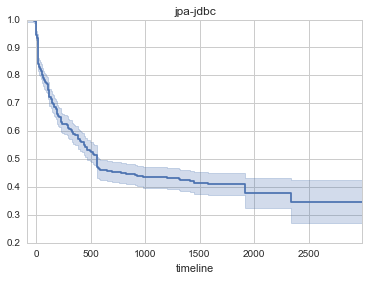

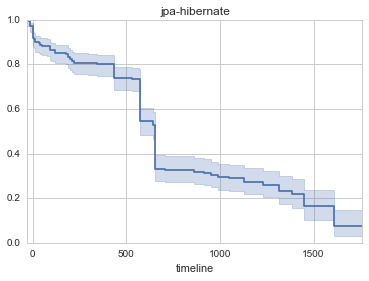

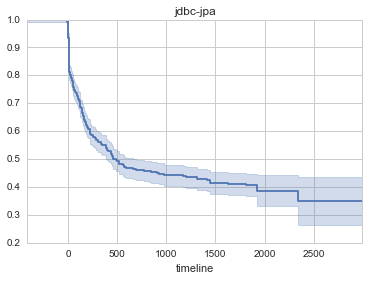

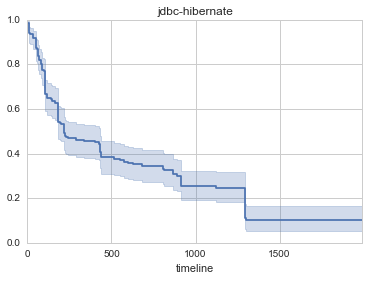

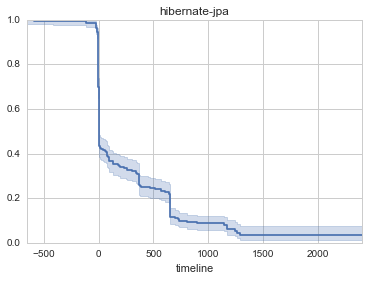

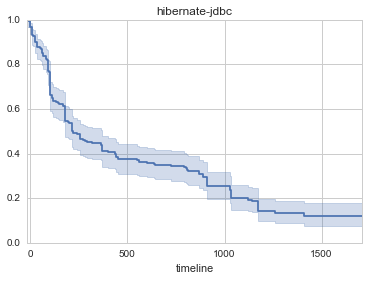

In [84]:
for t1 in technologies:
    for t2 in technologies:
        if t1 is not t2:
            data = pd.read_csv(directory + 'survival-' + t1 + '-' + t2 + '.csv')
            kmf.fit(data['duration'], data['event']).plot(title=t1 + '-' + t2, legend=False)

Plot the survival rates of files that used A and started to use B after B has been introduced in a project. 

Duration: time between B is introduced in a project and B is introduced in the considered file.

jpa after jdbc : 197 / 3554
jpa after hibernate : 44 / 1059
jdbc after jpa : 223 / 7444
jdbc after hibernate : 64 / 2154
hibernate after jpa : 87 / 1350
hibernate after jdbc : 63 / 1656


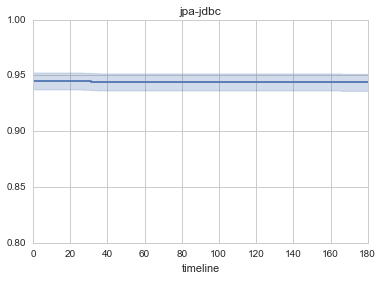

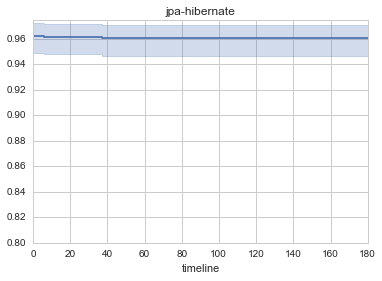

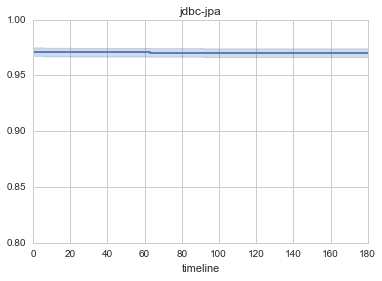

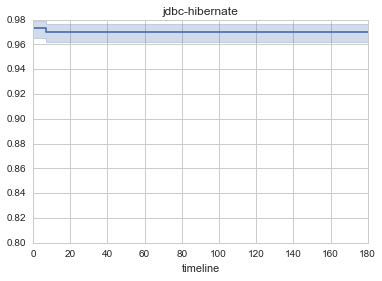

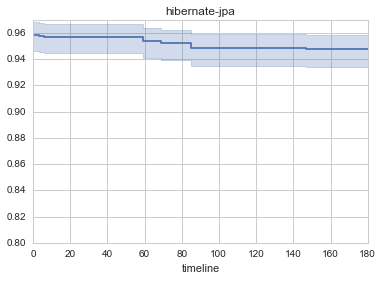

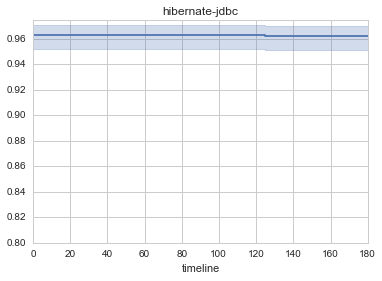

In [85]:
for t1 in technologies:
    for t2 in technologies:
        if t1 is not t2:
            data = pd.read_csv(directory + 'survival-' + t1 + '-after-' + t2 + '.csv')
            print(t1 + " after " + t2 + " : " + str(len(data[data['event']==1].index)) + " / " + str(len(data.index)))
            kmf.fit(data['duration'], data['event'])
            ax = kmf.plot(title=t1 + '-' + t2, legend=False)
            ax.set_xlim(left=0, right=180)
            lims = ax.get_ylim()
            ax.set_ylim(bottom=0.80, top=min(1, lims[1]))
            plt.savefig(directory + 'survival-' + t1 + '-after-' + t2 + '.pdf')
            plt.draw()
            
        

Displays the distribution over projects of the ratio of files having A that finally have B

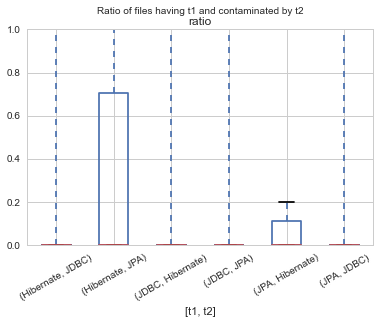

In [91]:
df = pd.read_csv(directory + 'contamination-ratio.csv')
technos = ['JDBC', 'JPA', 'Hibernate']
axe = df.boxplot(column='ratio', by=['t1','t2'], rot=30)
fig = axe.get_figure()
fig.suptitle('Ratio of files having t1 and contaminated by t2')
plt.savefig(directory + 'contamination-ratio.pdf')
plt.draw()

Shows the proportion of files that did have A when B has been introduced, and that have been contaminated by B after that

In [93]:
df = pd.read_csv(directory + 'contamination-ratio-evolution.csv')
technos = ['JDBC', 'JPA', 'Hibernate']

In [94]:
df

,project,t1,t2,duration,ratio,cumratio
0,jhalterman_modelmapper,JDBC,JPA,0,0,0.000000
1,jhalterman_modelmapper,JDBC,JPA,1,0,0.000000
2,jhalterman_modelmapper,JDBC,JPA,2,0,0.000000
3,jhalterman_modelmapper,JDBC,JPA,3,0,0.000000
4,jhalterman_modelmapper,JDBC,JPA,4,0,0.000000
5,jhalterman_modelmapper,JDBC,JPA,5,0,0.000000
6,jhalterman_modelmapper,JDBC,JPA,6,0,0.000000
7,jhalterman_modelmapper,JDBC,JPA,7,0,0.000000
8,jhalterman_modelmapper,JDBC,JPA,8,0,0.000000
9,jhalterman_modelmapper,JDBC,JPA,9,0,0.000000


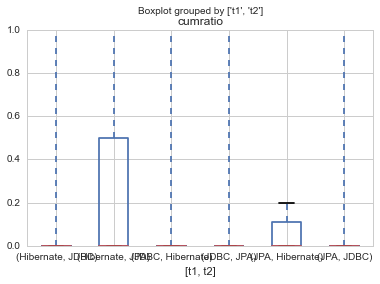

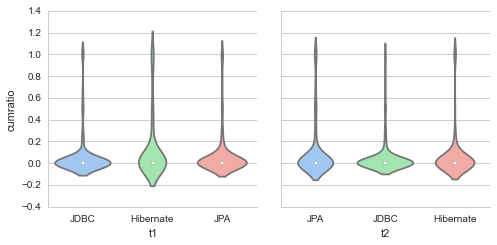

In [88]:
# 'Final' file status
DURATION = 15
df[df.duration==DURATION].boxplot(column='cumratio', by=['t1','t2'])
plt.savefig(directory + 'contamination-ratio-15w.pdf')
plt.draw()

#seaborn.violinplot(data=df[df.duration==DURATION], x='t2', y='cumratio')
seaborn.PairGrid(df[df.duration==DURATION], 
                 x_vars=['t1', 't2'],
                 y_vars=['cumratio'],
                 aspect=1,
                 size=3.5).map(seaborn.violinplot, palette='pastel')

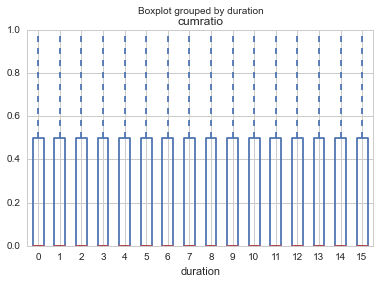

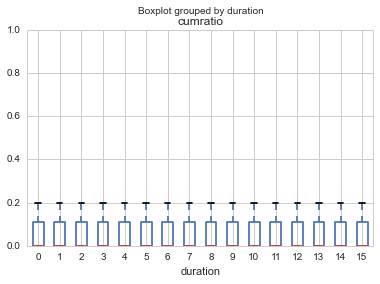

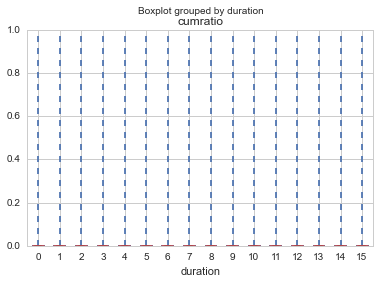

In [89]:
df_hb_jpa = df[(df.t1 == 'Hibernate') & (df.t2 == 'JPA')]
df_hb_jpa.boxplot(column='cumratio', by='duration')
plt.savefig(directory + 'contamination-hbm-jpa-evol.pdf')
plt.draw()


db_jpa_hbm = df[(df.t1 == 'JPA') & (df.t2 == 'Hibernate')]
db_jpa_hbm.boxplot(column='cumratio', by='duration')
plt.savefig(directory + 'contamination-jpa-hbm-evol.pdf')
plt.draw()

df.boxplot(column='cumratio', by='duration')
plt.savefig(directory + 'contamination-global-evol.pdf')
plt.draw()

# Category evolution

HBM -> JPA : 185
JPA -> HBM : 155


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d357710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12551f190>]], dtype=object)

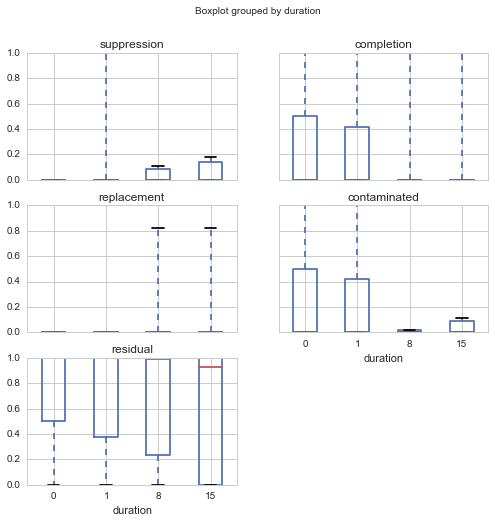

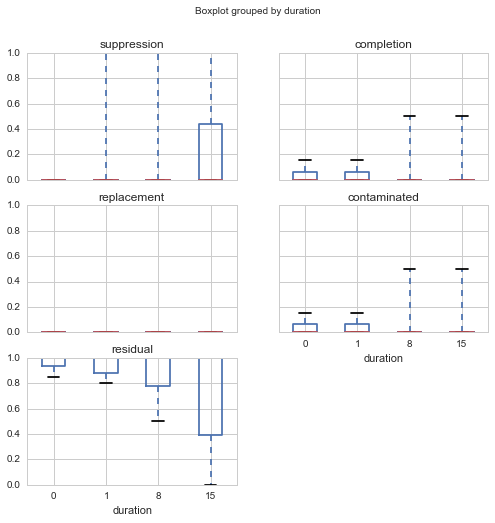

In [97]:
df_category = pd.read_csv(directory + "partition-ratio-evolution.csv")
df_category['contaminated'] = df_category['completion'] + df_category['replacement']

# Only projects having at least 10 interesting files
# df_category = df_category.query("interestingfiles >= 10")

hbm_jpa = "(t1 == 'Hibernate') & (t2 == 'JPA')"
jpa_hbm = "(t1 == 'JPA') & (t2 == 'Hibernate')"

print("HBM -> JPA : " + str(len(df_category.query(hbm_jpa))))
print("JPA -> HBM : " + str(len(df_category.query(jpa_hbm))))

cols = ['suppression', 'completion', 'replacement', 'contaminated', 'residual']

df_category.query(hbm_jpa).boxplot(column=cols, by='duration', figsize=(8,8))
df_category.query(jpa_hbm).boxplot(column=cols, by='duration', figsize=(8,8))


# New attempt to represent the evolution of transition from a technology to an other one

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116272e10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1154a1890>]], dtype=object)

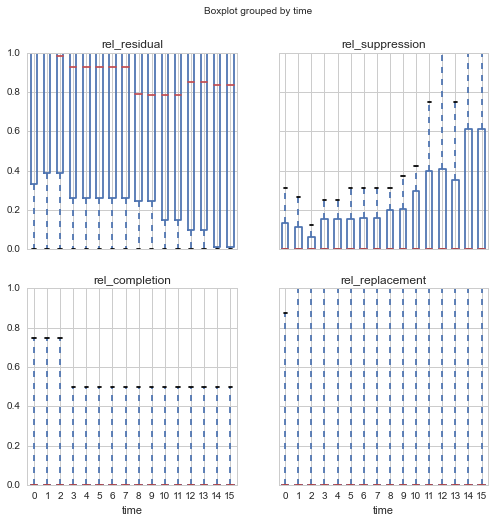

In [133]:
df = pd.read_csv(directory + "technology-transition.csv")

hbm_jpa = "(t1 == 'Hibernate') & (t2 == 'JPA')"
hbm_jdbc = "(t1 == 'Hibernate') & (t2 == 'JDBC')"

jpa_hbm = "(t1 == 'JPA') & (t2 == 'Hibernate')"
jpa_jdbc = "(t1 == 'JPA') & (t2 == 'JDBC')"

jdbc_hbm = "(t1 == 'JDBC') & (t2 == 'Hibernate')"
jdbc_jpa = "(t1 == 'JDBC') & (t2 == 'JPA')"

cols = ['rel_residual', 'rel_suppression', 'rel_completion', 'rel_replacement']

df.query(hbm_jpa).boxplot(column=cols, by='time', figsize=(8,8))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ed99fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10edb9590>]], dtype=object)

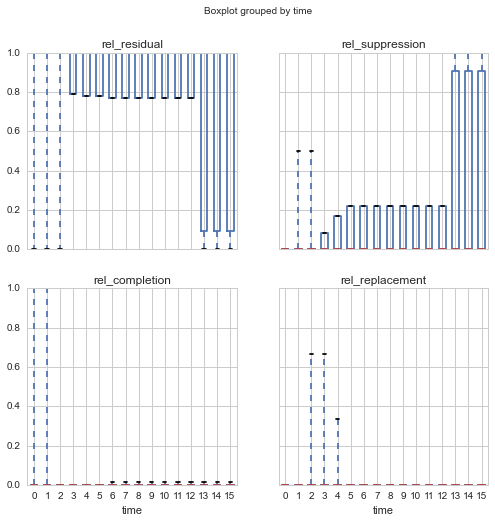

In [51]:
df.query(jpa_hbm).boxplot(column=cols, by='time', figsize=(8,8))


Determines 4 project profiles: 
    - residual, if a majority of files remains with A
    - suppression, if a majority of files are removed, or if they don't contain A nor B anymore
    - completion, if a majority of files have both technologies
    - replacement, if a majority of files only have B
    
Shows the proportion of projects that belong to each profiles over time. 

## From JDBC to something else

    - Replacement and completion are the dominant profile for less than 3% of all projects. 
    - Projects mainly belong to the residual profile during the entire observation period, even if, over time, an increasing number of projects leave this profile for the suppression profile.
    
## From something else to JDBC

    - A substential introduction of JDDBC in existing database-related files are observed in a few projects.
    - The vast majority of projects tend to not predominantly upgrade their files in order to benefit from the introduction of JDBC in the project. 
    
    
## From JPA to Hibernate

    - A similar trend is observed in projects using JPA, and in which Hibernate is introduced: one month after the introduction of Hibernate, 75% of concerned projects remains in the residual profile. 
    - Completion and replacement is only short-term situations: the few projects in which such a behaviour has been clearly observed change their profile at the latest one month after Hibernate has been introduced in the project.
    - While most projects remain residual during the entire observation period, the number of projects in which most of initially JPA-related files loss their relation to JPA constently increases over time. 
    - Conclusion: for this transition, the only long-term observable project behaviour consists in not introducing Hibernate in the initial JPA-related files, until JPA is removed from most of these files become (for some projects).
    
    
## From Hibernate to JPA

This transition shows more diversified project profiles.
    - The most often adopted profile remains the 'residual' profiles, according to which most Hibernate-related files are not updated to use JPA annotations. A evolutionary suppression pattern similar to that which has been observed in the previously discussed transitions can be seen when JPA is introduced:  the relative number of projects that suppressed a majority of the initially existing Hibernate-related files increases over time to reach 26%.
    - Contrary to the other other transitions, a clear completion or replacement behaviour can be observed in 3.6% and 14.3% of the considered projects (respectively). The number of projects in which such a coverage of the initially existing Hibernate-related files by JPA remains relativelly stable over time. 
    - The relative importance of the 'replacement' profile could bring to light the determination of some project developpers to introduce JPA as an alternative to Hibernate, including for files in which Hibernate is already present and supposedly used. 


## Global observations

    - Whatever the considered transition, the most commonly adopted profile is 'residual': most projects tend to not change their existing files in order to adapt them to the lately introduced technology. 
    - Over time, an increasing number of projects tend to massively remove the first considered technology from the files in which the technology was initialy present. This removal does not reflect a project migration from the first technology to the lately one, since the second technology is not introduced in the same proportion in the concerned files.
    - Concerning the transition from Hibernate to JPA, we found that, for 18% of projects, JPA is massively introduced in files for replacing or completing Hibernate. Such a file migration has not been observed for the other considered transitions.

JDBC -> Hibernate
    completion  replacement  residual  suppression  time
0            0     0.021277  0.872340     0.106383     0
1            0     0.021277  0.851064     0.127660     1
2            0     0.021277  0.851064     0.127660     2
3            0     0.021739  0.826087     0.152174     3
4            0     0.021739  0.826087     0.152174     4
5            0     0.021739  0.826087     0.152174     5
6            0     0.021277  0.808511     0.170213     6
7            0     0.021277  0.787234     0.191489     7
8            0     0.021277  0.787234     0.191489     8
9            0     0.021277  0.765957     0.212766     9
10           0     0.021277  0.765957     0.212766    10
11           0     0.021277  0.765957     0.212766    11
12           0     0.021277  0.765957     0.212766    12
13           0     0.021277  0.765957     0.212766    13
14           0     0.021277  0.765957     0.212766    14
15           0     0.021277  0.765957     0.212766    15


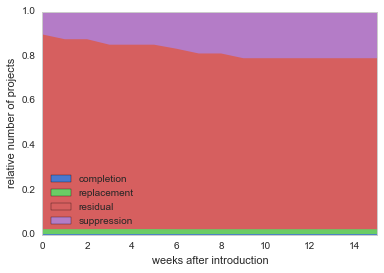

JDBC -> JPA
    completion  replacement  residual  suppression  time
0     0.022222            0  0.881481     0.096296     0
1     0.022727            0  0.871212     0.106061     1
2     0.022901            0  0.847328     0.129771     2
3     0.022901            0  0.816794     0.160305     3
4     0.015267            0  0.801527     0.183206     4
5     0.015385            0  0.800000     0.184615     5
6     0.015385            0  0.769231     0.215385     6
7     0.015385            0  0.761538     0.223077     7
8     0.015385            0  0.746154     0.238462     8
9     0.015385            0  0.738462     0.246154     9
10    0.015385            0  0.730769     0.253846    10
11    0.015504            0  0.728682     0.255814    11
12    0.015748            0  0.732283     0.251969    12
13    0.015748            0  0.732283     0.251969    13
14    0.015625            0  0.726562     0.257812    14
15    0.015504            0  0.713178     0.271318    15


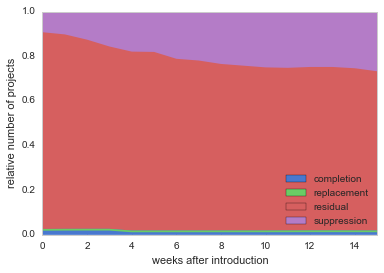

Hibernate -> JDBC
    completion  replacement  residual  suppression  time
0     0.043478     0.000000  0.913043     0.043478     0
1     0.043478     0.000000  0.913043     0.043478     1
2     0.043478     0.000000  0.913043     0.043478     2
3     0.043478     0.000000  0.913043     0.043478     3
4     0.043478     0.000000  0.869565     0.086957     4
5     0.043478     0.000000  0.869565     0.086957     5
6     0.043478     0.000000  0.869565     0.086957     6
7     0.043478     0.000000  0.826087     0.130435     7
8     0.043478     0.000000  0.826087     0.130435     8
9     0.043478     0.000000  0.826087     0.130435     9
10    0.045455     0.000000  0.772727     0.181818    10
11    0.045455     0.000000  0.772727     0.181818    11
12    0.045455     0.000000  0.772727     0.181818    12
13    0.045455     0.000000  0.772727     0.181818    13
14    0.045455     0.000000  0.772727     0.181818    14
15    0.000000     0.045455  0.727273     0.227273    15


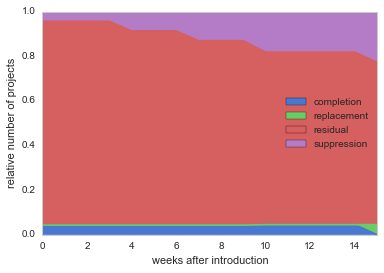

Hibernate -> JPA
    completion  replacement  residual  suppression  time
0     0.142857     0.071429  0.678571     0.107143     0
1     0.107143     0.107143  0.714286     0.071429     1
2     0.071429     0.142857  0.714286     0.071429     2
3     0.035714     0.142857  0.678571     0.142857     3
4     0.035714     0.142857  0.678571     0.142857     4
5     0.035714     0.142857  0.678571     0.142857     5
6     0.035714     0.142857  0.678571     0.142857     6
7     0.035714     0.142857  0.678571     0.142857     7
8     0.035714     0.142857  0.642857     0.178571     8
9     0.034483     0.172414  0.620690     0.172414     9
10    0.035714     0.178571  0.607143     0.178571    10
11    0.035714     0.142857  0.607143     0.214286    11
12    0.037037     0.148148  0.592593     0.222222    12
13    0.037037     0.148148  0.592593     0.222222    13
14    0.037037     0.111111  0.592593     0.259259    14
15    0.037037     0.111111  0.592593     0.259259    15


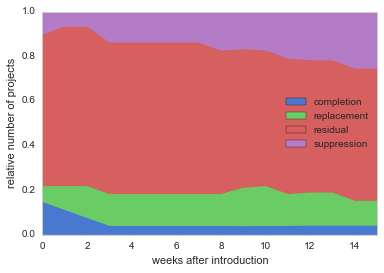

JPA -> JDBC
    completion  replacement  residual  suppression  time
0     0.007576     0.007576  0.878788     0.106061     0
1     0.008130     0.000000  0.918699     0.073171     1
2     0.008333     0.000000  0.891667     0.100000     2
3     0.000000     0.000000  0.873950     0.126050     3
4     0.008547     0.000000  0.863248     0.128205     4
5     0.008621     0.000000  0.862069     0.129310     5
6     0.008621     0.000000  0.862069     0.129310     6
7     0.008696     0.000000  0.869565     0.121739     7
8     0.008696     0.000000  0.869565     0.121739     8
9     0.008696     0.000000  0.860870     0.130435     9
10    0.008772     0.000000  0.850877     0.140351    10
11    0.000000     0.000000  0.857143     0.142857    11
12    0.000000     0.000000  0.837838     0.162162    12
13    0.000000     0.000000  0.837838     0.162162    13
14    0.000000     0.000000  0.828829     0.171171    14
15    0.000000     0.000000  0.819820     0.180180    15


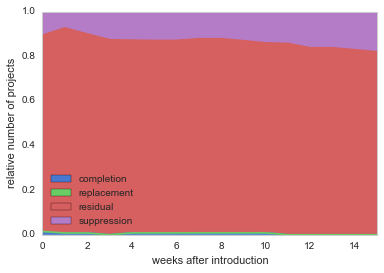

JPA -> Hibernate
    completion  replacement  residual  suppression  time
0     0.058824     0.000000  0.941176     0.000000     0
1     0.055556     0.000000  0.888889     0.055556     1
2     0.000000     0.058824  0.882353     0.058824     2
3     0.000000     0.062500  0.750000     0.187500     3
4     0.000000     0.000000  0.750000     0.250000     4
5     0.000000     0.000000  0.750000     0.250000     5
6     0.000000     0.000000  0.750000     0.250000     6
7     0.000000     0.000000  0.750000     0.250000     7
8     0.000000     0.000000  0.750000     0.250000     8
9     0.000000     0.000000  0.750000     0.250000     9
10    0.000000     0.000000  0.750000     0.250000    10
11    0.000000     0.000000  0.750000     0.250000    11
12    0.000000     0.000000  0.750000     0.250000    12
13    0.000000     0.000000  0.687500     0.312500    13
14    0.000000     0.000000  0.687500     0.312500    14
15    0.000000     0.000000  0.625000     0.375000    15


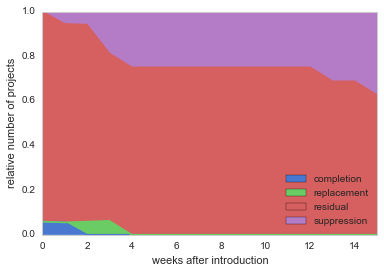

In [186]:
TIME_FINAL_STATE = 16 # 15 weeks after the introduction of B

technologies = ['JDBC', 'Hibernate', 'JPA']

residual_predicate    = 'rel_residual >= rel_suppression & rel_residual >= rel_completion & rel_residual >= rel_replacement'
suppression_predicate = 'rel_suppression >= rel_residual & rel_suppression >= rel_completion & rel_suppression >= rel_replacement'   
completion_predicate  = 'rel_completion >= rel_residual & rel_completion >= rel_suppression & rel_completion >= rel_replacement'
replacement_predicate = 'rel_replacement >= rel_residual & rel_replacement >= rel_suppression & rel_replacement >= rel_completion'

seaborn.set_palette("muted")
for t1 in technologies:
	for t2 in technologies:
		if(t1 is not t2):
			print t1 + " -> " + t2
			transition = "(t1 == '" + t1 + "') & (t2 == '" + t2 + "')"
			lines = list()
			df_transition = df.query(transition)
			            
			for t in range(TIME_FINAL_STATE):
				data = df_transition.query('(time == ' + str(t) + ")")
				
				residuals =    len(data.query(residual_predicate))
				suppressions = len(data.query(suppression_predicate))
				completions =  len(data.query(completion_predicate))
				replacements = len(data.query(replacement_predicate))
				
				itotal = residuals + suppressions + completions + replacements
				total = float(itotal)
				
				if(itotal > 0):
					dico = {'residual': residuals / total,
                      'suppression': suppressions / total,
                      'completion': completions / total,
                      'replacement': replacements / total,
                      'time': t
					}
				else:
					dico = {'residual': 0,
                      'suppression': 0,
                      'completion': 0,
                      'replacement': 0,
                      'time': t
					}
				    
				lines.append(dico)
			evol_df = pd.DataFrame.from_records(lines)
			            
			print evol_df
			
			#ax = evol_df.plot(kind='area', x='time', title='Introduction of ' + t2 + ' after ' + t1)
 			ax = evol_df.plot(kind='area', x='time')
			ax.set_ylabel('relative number of projects')
			ax.set_xlabel('weeks after introduction')            
			plt.savefig(directory + '../../saner2016 - orm survival/paper/figures/migration-trend-evolution-' + t1 + '-' + t2 + '.pdf')
			plt.show()